In [2]:
#Importing stuff
import pandas as pd
import math as mt
import statistics as st

import matplotlib.pyplot as plt
#loading data
df1 = pd.read_csv("bit.csv")
df2 = pd.read_csv("vix.csv")

In [ ]:
    df1['Date'].iloc[196]


In [4]:
###Making 2018 subset of bitcoin data
#var containing rows of daily bitcoin subset of the year 2018
y_2018 = [];
##Loop to make 2018 for bitcoin subset
for row in range(0,len(df1['Date'])):
    if df1['Date'].iloc[row][8:12] == "2018":
        y_2018.append(row)

##Making Datframe subset of bitcoin data in 2018
dfbit_2018 = df1.iloc[y_2018]
    


In [ ]:
dfbit_2018

In [6]:
###2018 subset of vix data
#var containing rows of daily  subset of the year 2018
y_2018 = [];
##Loop to make 2018 for Vix subset
for row in range(0,len(df2['Date'])):
    if df2['Date'].iloc[row][0:4] == "2018":
        y_2018.append(row)

##Making Datframe subset of bitcoin data in 2018
dfvix_2018 = df2.iloc[y_2018]

In [ ]:
    dfvix_2018

In [ ]:
### converting bit month to number
for row in range(0,len(dfbit_2018['Date'])):
    if dfbit_2018['Date'].iloc[row][0:3] == "Jan":
        dfbit_2018['Date'].iloc[row] = "01" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Feb":
        dfbit_2018['Date'].iloc[row] = "02" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Mar":
        dfbit_2018['Date'].iloc[row] = "03" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Apr":
        dfbit_2018['Date'].iloc[row] = "04" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "May":
        dfbit_2018['Date'].iloc[row] = "05" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Jun":
        dfbit_2018['Date'].iloc[row] = "06" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Jul":
        dfbit_2018['Date'].iloc[row] = "07" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Aug":
        dfbit_2018['Date'].iloc[row] = "08" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Sep":
        dfbit_2018['Date'].iloc[row] = "09" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Oct":
        dfbit_2018['Date'].iloc[row] = "10" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Nov":
        dfbit_2018['Date'].iloc[row] = "11" + dfbit_2018['Date'].iloc[row][3:]
    if dfbit_2018['Date'].iloc[row][0:3] == "Dec":
        dfbit_2018['Date'].iloc[row] = "12" + dfbit_2018['Date'].iloc[row][3:]
   
       
   

In [ ]:
dfbit_2018['Date']

In [10]:
###Getting rows that will be merged
#Vars holding merge rows 
bitrow = []
vixrow = []
#copy to convert bit month

##Loop to find matching rows
for vixr in range(0,len(dfvix_2018['Date'])):
    for bitr in range(0,len(dfbit_2018['Date'])):
        
        #checking for same month
        if dfvix_2018['Date'].iloc[vixr][5:7] == dfbit_2018['Date'].iloc[bitr][0:2]:
            #checking day
            if dfvix_2018['Date'].iloc[vixr][8:10] == dfbit_2018['Date'].iloc[bitr][3:5]:
                
                bitrow.append(bitr)
                vixrow.append(vixr)
                break
    

In [12]:
###Making subeste of bit and vix that only contains shared rows
mervix = dfvix_2018.iloc[vixrow]
merbit = dfbit_2018.iloc[bitrow]


In [14]:
##Final Merging for 2018 data
#fixing the indexes of the new datasets
mervix = mervix.set_index(pd.Index(range(0, 251)))
merbit = merbit.set_index(pd.Index(range(0, 251)))
#Making the merge 2018 dataset
merge_data = pd.concat([mervix, merbit], axis=1) 
merge_data

,Date,VIX Open,VIX High,VIX Low,VIX Close,Unnamed: 0,Date,Open,High,Low,Close**,Volume,Market Cap
0,2018-01-02,10.95,11.07,9.52,9.77,560,"01 02, 2018",13625.00,15444.60,13163.60,14982.10,"16,846,600,192","251,377,913,955"
1,2018-01-03,9.56,9.65,8.94,9.15,559,"01 03, 2018",14978.20,15572.80,14844.50,15201.00,"16,871,900,160","255,080,562,912"
2,2018-01-04,9.01,9.31,8.92,9.22,558,"01 04, 2018",15270.70,15739.70,14522.20,15599.20,"21,783,199,744","261,795,321,110"
3,2018-01-05,9.10,9.54,9.00,9.22,557,"01 05, 2018",15477.20,17705.20,15202.80,17429.50,"23,840,899,072","292,544,135,538"
4,2018-01-08,9.61,9.89,9.32,9.52,554,"01 08, 2018",16476.20,16537.90,14208.20,15170.10,"18,413,899,776","254,715,263,101"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-24,29.29,36.10,29.16,36.07,204,"12 24, 2018",4000.33,4271.79,4000.33,4078.60,"7,240,968,501","71,137,548,589"
247,2018-12-26,35.50,36.20,29.59,30.41,202,"12 26, 2018",3819.67,3893.36,3769.86,3857.30,"5,326,547,918","67,292,819,465"
248,2018-12-27,31.20,33.80,29.66,29.96,201,"12 27, 2018",3854.69,3874.42,3645.45,3654.83,"5,130,222,366","63,768,757,101"
249,2018-12-28,29.97,31.05,27.43,28.34,200,"12 28, 2018",3653.13,3956.14,3642.63,3923.92,"5,631,554,348","68,471,837,969"


In [59]:
merge_data


,Date,VIX Open,VIX High,VIX Low,VIX Close,Unnamed: 0,Date,Open,High,Low,Close**,Volume,Market Cap
0,2018-01-02,10.95,11.07,9.52,9.77,560,"01 02, 2018",13625.00,15444.60,13163.60,14982.10,"16,846,600,192","251,377,913,955"
1,2018-01-03,9.56,9.65,8.94,9.15,559,"01 03, 2018",14978.20,15572.80,14844.50,15201.00,"16,871,900,160","255,080,562,912"
2,2018-01-04,9.01,9.31,8.92,9.22,558,"01 04, 2018",15270.70,15739.70,14522.20,15599.20,"21,783,199,744","261,795,321,110"
3,2018-01-05,9.10,9.54,9.00,9.22,557,"01 05, 2018",15477.20,17705.20,15202.80,17429.50,"23,840,899,072","292,544,135,538"
4,2018-01-08,9.61,9.89,9.32,9.52,554,"01 08, 2018",16476.20,16537.90,14208.20,15170.10,"18,413,899,776","254,715,263,101"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-24,29.29,36.10,29.16,36.07,204,"12 24, 2018",4000.33,4271.79,4000.33,4078.60,"7,240,968,501","71,137,548,589"
247,2018-12-26,35.50,36.20,29.59,30.41,202,"12 26, 2018",3819.67,3893.36,3769.86,3857.30,"5,326,547,918","67,292,819,465"
248,2018-12-27,31.20,33.80,29.66,29.96,201,"12 27, 2018",3854.69,3874.42,3645.45,3654.83,"5,130,222,366","63,768,757,101"
249,2018-12-28,29.97,31.05,27.43,28.34,200,"12 28, 2018",3653.13,3956.14,3642.63,3923.92,"5,631,554,348","68,471,837,969"


In [ ]:
###Making Rate of change per day
##For Vix data
merge_data["VIX %DChange"] = -999
merge_data["BTC %DChange"] = -999
for row in range(0,251):
    merge_data["VIX %DChange"].iloc[row] =  (merge_data["VIX Close"].iloc[row] -  merge_data["VIX Open"].iloc[row])/merge_data["VIX Open"].iloc[row] * 100
##For BTC data
for row in range(0,251):
    merge_data["BTC %DChange"].iloc[row] =  (merge_data["Close**"].iloc[row] -  merge_data["Open"].iloc[row])/merge_data["Open"].iloc[row] * 100
merge_data

In [18]:
merge_data

,Date,VIX Open,VIX High,VIX Low,VIX Close,Unnamed: 0,Date,Open,High,Low,Close**,Volume,Market Cap,VIX %DChange,BTC %DChange
0,2018-01-02,10.95,11.07,9.52,9.77,560,"01 02, 2018",13625.00,15444.60,13163.60,14982.10,"16,846,600,192","251,377,913,955",-10.776256,9.960367
1,2018-01-03,9.56,9.65,8.94,9.15,559,"01 03, 2018",14978.20,15572.80,14844.50,15201.00,"16,871,900,160","255,080,562,912",-4.288703,1.487495
2,2018-01-04,9.01,9.31,8.92,9.22,558,"01 04, 2018",15270.70,15739.70,14522.20,15599.20,"21,783,199,744","261,795,321,110",2.330744,2.151178
3,2018-01-05,9.10,9.54,9.00,9.22,557,"01 05, 2018",15477.20,17705.20,15202.80,17429.50,"23,840,899,072","292,544,135,538",1.318681,12.614039
4,2018-01-08,9.61,9.89,9.32,9.52,554,"01 08, 2018",16476.20,16537.90,14208.20,15170.10,"18,413,899,776","254,715,263,101",-0.936524,-7.927192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-24,29.29,36.10,29.16,36.07,204,"12 24, 2018",4000.33,4271.79,4000.33,4078.60,"7,240,968,501","71,137,548,589",23.147832,1.956589
247,2018-12-26,35.50,36.20,29.59,30.41,202,"12 26, 2018",3819.67,3893.36,3769.86,3857.30,"5,326,547,918","67,292,819,465",-14.338028,0.985164
248,2018-12-27,31.20,33.80,29.66,29.96,201,"12 27, 2018",3854.69,3874.42,3645.45,3654.83,"5,130,222,366","63,768,757,101",-3.974359,-5.184853
249,2018-12-28,29.97,31.05,27.43,28.34,200,"12 28, 2018",3653.13,3956.14,3642.63,3923.92,"5,631,554,348","68,471,837,969",-5.438772,7.412548


In [95]:
merge_data.iloc[jan_rows, 6]

0     01 02, 2018
1     01 03, 2018
2     01 04, 2018
3     01 05, 2018
4     01 08, 2018
5     01 09, 2018
6     01 10, 2018
7     01 11, 2018
8     01 12, 2018
9     01 16, 2018
10    01 17, 2018
11    01 18, 2018
12    01 19, 2018
13    01 22, 2018
14    01 23, 2018
15    01 24, 2018
16    01 25, 2018
17    01 26, 2018
18    01 29, 2018
19    01 30, 2018
20    01 31, 2018
Name: Date, dtype: object

In [30]:
##Making Subsets of Months
#Row Holder for months
jan_rows = []
feb_rows = []
mar_rows = []
apr_rows = []
may_rows = []
jun_rows = []
jul_rows = []
aug_rows = []
sep_rows = []
oct_rows = []
nov_rows = []
dec_rows = []



In [74]:
#Function used just swap out values to get month subset
for row in range(0,251):
    if merge_data.iloc[row, 6][0:2] == "12":
        dec_rows.append(row)

In [84]:
merge_data

,Date,VIX Open,VIX High,VIX Low,VIX Close,Unnamed: 0,Date,Open,High,Low,Close**,Volume,Market Cap,VIX %DChange,BTC %DChange
0,2018-01-02,10.95,11.07,9.52,9.77,560,"01 02, 2018",13625.00,15444.60,13163.60,14982.10,"16,846,600,192","251,377,913,955",-10.776256,9.960367
1,2018-01-03,9.56,9.65,8.94,9.15,559,"01 03, 2018",14978.20,15572.80,14844.50,15201.00,"16,871,900,160","255,080,562,912",-4.288703,1.487495
2,2018-01-04,9.01,9.31,8.92,9.22,558,"01 04, 2018",15270.70,15739.70,14522.20,15599.20,"21,783,199,744","261,795,321,110",2.330744,2.151178
3,2018-01-05,9.10,9.54,9.00,9.22,557,"01 05, 2018",15477.20,17705.20,15202.80,17429.50,"23,840,899,072","292,544,135,538",1.318681,12.614039
4,2018-01-08,9.61,9.89,9.32,9.52,554,"01 08, 2018",16476.20,16537.90,14208.20,15170.10,"18,413,899,776","254,715,263,101",-0.936524,-7.927192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-24,29.29,36.10,29.16,36.07,204,"12 24, 2018",4000.33,4271.79,4000.33,4078.60,"7,240,968,501","71,137,548,589",23.147832,1.956589
247,2018-12-26,35.50,36.20,29.59,30.41,202,"12 26, 2018",3819.67,3893.36,3769.86,3857.30,"5,326,547,918","67,292,819,465",-14.338028,0.985164
248,2018-12-27,31.20,33.80,29.66,29.96,201,"12 27, 2018",3854.69,3874.42,3645.45,3654.83,"5,130,222,366","63,768,757,101",-3.974359,-5.184853
249,2018-12-28,29.97,31.05,27.43,28.34,200,"12 28, 2018",3653.13,3956.14,3642.63,3923.92,"5,631,554,348","68,471,837,969",-5.438772,7.412548


In [ ]:
#Scatter Plot Of btc and vix 

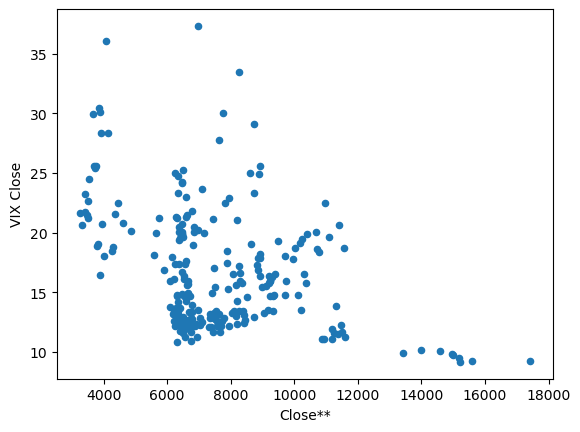

In [86]:
merge_data.plot.scatter(x='Close**', y='VIX Close')
plt.show()

In [90]:
#Correlation of close of btc and and Vix
correlation = merge_data['Close**'].corr(merge_data['VIX Close']) 
correlation

-0.3890931360784106

In [112]:
###Finding median of btc & vix price per month
#Vars holding value
btc_m = []
vix_m = []
#for loop getting month medians btc
for month in range(1,13):
    #Holding value of days
    day_v = []
    #Going through each Day
    for day in range(0,251):
        if int(merge_data.iloc[day,6][0:2]) == month:
            day_v.append(merge_data["Close**"].iloc[day])
    btc_m.append(st.median(day_v))
#for loop getting month medians Vix
for month in range(1,13):
    #Holding value of days
    day_v = []
    #Going through each Day
    for day in range(0,251):
        if int(merge_data.iloc[day,6][0:2]) == month:
            day_v.append(merge_data["VIX Close"].iloc[day])
    vix_m.append(st.median(day_v))
    

<Axes: xlabel='Month'>

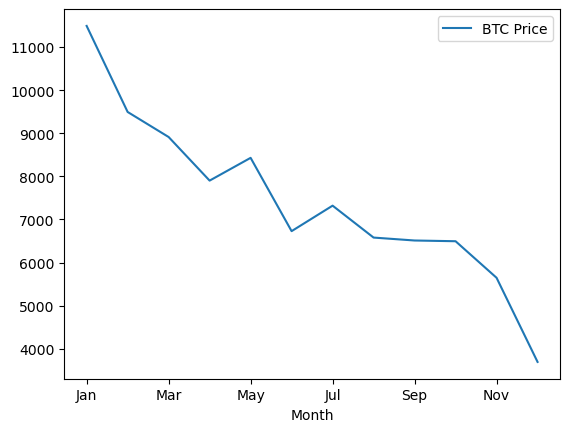

In [126]:
#Line graph for btc
data = {'BTC Price': btc_m,
        'Month': ['Jan', 'Feb', 'Mar', 'Apri', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
       }
df = pd.DataFrame(data)
df.plot(x='Month', y='BTC Price') 

<Axes: xlabel='Month'>

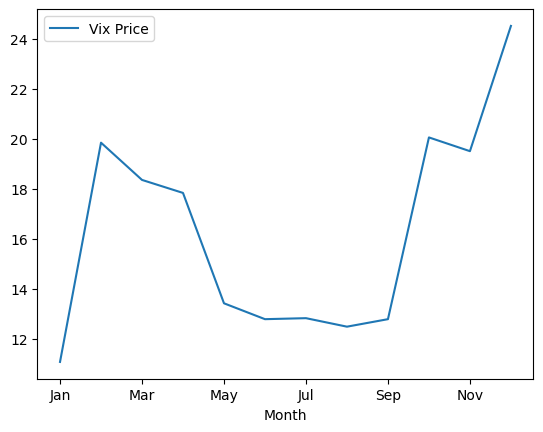

In [128]:
#Line graph for Vix
data = {'Vix Price': vix_m,
        'Month': ['Jan', 'Feb', 'Mar', 'Apri', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
       }
df = pd.DataFrame(data)
df.plot(x='Month', y='Vix Price') 

In [ ]:
#Scatter Plot for market cap btc and rate of change vix
merge_data["AbsVixRate"] = abs(merge_data["VIX %DChange"])


<Axes: xlabel='AbsVixRate', ylabel='Close**'>

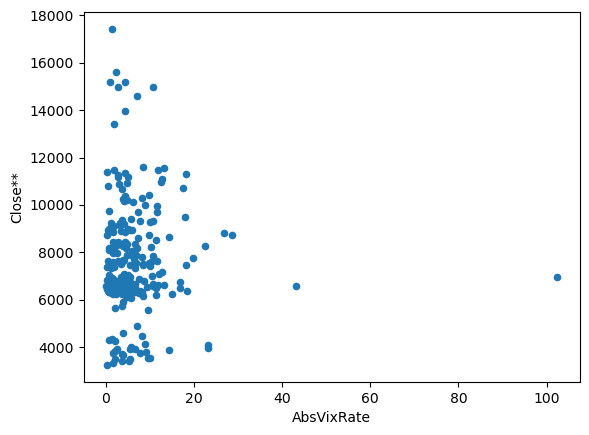

In [172]:

merge_data.plot.scatter(x='AbsVixRate', y='Close**')


In [174]:
###Line Graph of 
#Var to hold medians by month
VixR_m = []
#for loop getting month medians VixRATE
for month in range(1,13):
    #Holding value of days
    day_v = []
    #Going through each Day
    for day in range(0,251):
        if int(merge_data.iloc[day,6][0:2]) == month:
            day_v.append(merge_data["AbsVixRate"].iloc[day])
    VixR_m.append(st.median(day_v))
    

<Axes: xlabel='Month'>

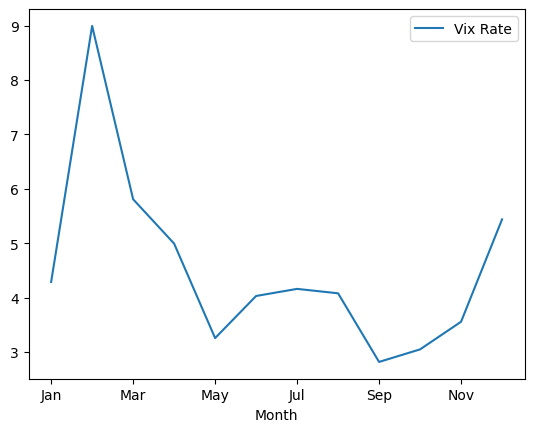

In [180]:
#Line graph for Vix
data = {'Vix Rate': VixR_m,
        'Month': ['Jan', 'Feb', 'Mar', 'Apri', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
       }
df = pd.DataFrame(data)
df.plot(x='Month', y='Vix Rate') 